## Background

PetMind is a retailer of products for pets. They are based in the United States. \
PetMind sells products that are a mix of luxury items and everyday items. Luxury items include
toys. Everyday items include food.\
The company wants to increase sales by selling more everyday products repeatedly.\
They have been testing this approach for the last year.\
They now want a report on how repeat purchases impact sales.

### Import data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv(r'C:\Users\GRZEGORZ\Downloads\pet_supplies_2212.csv')
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


### State whether the values match the description given in the table

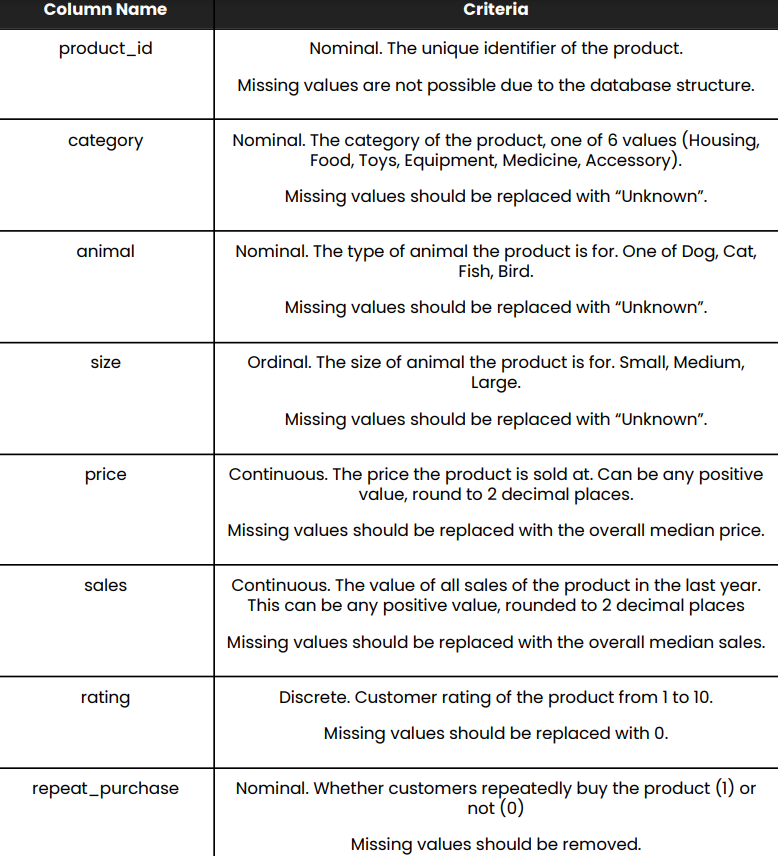

#### product_id

In [5]:
# Check unique values
df['product_id'].is_unique

True

In [6]:
df['product_id'].min()

1

In [7]:
df['product_id'].max()

1500

In [8]:
start = 1
end = 1500


are_all_values_present = all(num in df['product_id'] for num in range(start, end))

if are_all_values_present:
    print(f"All values from {start} to {end} are present in the list")
else:
    print(f"Not all values from {start} to {end} are present in the list")


All values from 1 to 1500 are present in the list


In [66]:
# Check missing values
df['product_id'].isnull().values.any()

False

The values are consistent with the description

#### category

In [57]:
df.groupby('category').size()

category
-             25
Accessory    126
Equipment    370
Food         260
Housing      227
Medicine     237
Toys         255
dtype: int64

In [58]:
list = ['Housing', 'Food', 'Toys', 'Equipment', 'Medicine', 'Accessory']

df['category'].isin(list).values.any()

True

In [60]:
# Change missing values
new_column = df['category'].replace("-", "Unknown")
df['category'] = new_column
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [63]:
# Another look at values after changes
df.groupby('category').size()

category
Accessory    126
Equipment    370
Food         260
Housing      227
Medicine     237
Toys         255
Unknown       25
dtype: int64

I changed the value '-' to 'Unknown' to make the values consistent with the description

#### animal

In [64]:
df.groupby('animal').size()

animal
Bird    197
Cat     567
Dog     367
Fish    369
dtype: int64

In [74]:
# Check missing values
df['animal'].isnull().values.any()

False

The values are consistent with the description

#### size

In [67]:
df.groupby('size').size()

size
LARGE      57
Large      75
MEDIUM    109
Medium    150
SMALL     157
Small     225
large     122
medium    233
small     372
dtype: int64

In [71]:
# Standardizing letter case
new_column_1 = df['size'].str.capitalize()
df['size'] = new_column_1
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.1,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [72]:
df.groupby('size').size()

size
Large     254
Medium    492
Small     754
dtype: int64

In [73]:
# Check missing values
df['size'].isnull().values.any()

False

I standardized the letter case

#### price

In [89]:
df['price'].min()
# All value are above 0

'12.85'

In [92]:
df.groupby('price').size()

price
12.85         1
12.89         1
13.02         1
13.13         1
14.89         1
           ... 
54.03         1
54.05         1
54.07         2
54.16         1
unlisted    150
Length: 707, dtype: int64

In [91]:
# Count a median
a = pd.to_numeric(df['price'], errors='coerce').notnull()
median = df.loc[a, 'price'].median()
median

28.064999999999998

In [93]:
# Replace missing value with median
new_column_2 = df['price'] = np.where(df['price'] == 'unlisted', median, df['price'])
df['price'] = new_column_2
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.1,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [102]:
# Creating an auxiliary variable.
q = pd.to_numeric(df['price'], errors='coerce')
q

0       51.10
1       35.98
2       31.23
3       24.95
4       26.18
        ...  
1495    40.91
1496    32.89
1497    25.79
1498    19.94
1499    25.95
Name: price, Length: 1500, dtype: float64

In [104]:
# Round to 2 decimal places.
new_column_3 = round(q, 2)
df['price'] = new_column_3
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


#### sales

In [106]:
df['sales'].min()
# All value are above 0

286.94

In [110]:
# Count a median
median_sales = df['sales'].median()
median_sales

1000.8299999999999

In [112]:
# Replace missing value with median
new_column_4 = df['sales'] = df['sales'].fillna(median_sales)
df['price'] = new_column_4
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,1860.62,1860.62,7.0,1
1,2,Housing,Bird,Medium,963.60,963.60,6.0,0
2,3,Food,Dog,Medium,898.30,898.30,5.0,1
3,4,Medicine,Cat,Small,982.15,982.15,6.0,1
4,5,Housing,Cat,Small,832.63,832.63,7.0,1


In [113]:
# Round to 2 decimal places.
p = pd.to_numeric(df['sales'], errors='coerce')
new_column_5 = round(p, 2)
df['sales'] = new_column_5
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,1860.62,1860.62,7.0,1
1,2,Housing,Bird,Medium,963.60,963.60,6.0,0
2,3,Food,Dog,Medium,898.30,898.30,5.0,1
3,4,Medicine,Cat,Small,982.15,982.15,6.0,1
4,5,Housing,Cat,Small,832.63,832.63,7.0,1


#### rating

In [114]:
# Replace missing value with 0
new_column_6 = df['rating'] = df['rating'].fillna(0)
df['rating'] = new_column_6
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,1860.62,1860.62,7.0,1
1,2,Housing,Bird,Medium,963.60,963.60,6.0,0
2,3,Food,Dog,Medium,898.30,898.30,5.0,1
3,4,Medicine,Cat,Small,982.15,982.15,6.0,1
4,5,Housing,Cat,Small,832.63,832.63,7.0,1


In [116]:
df['rating'].isnull().any()

False

#### repeat_purchase

In [117]:
df.groupby('repeat_purchase').size()

repeat_purchase
0    594
1    906
dtype: int64

In [118]:
# Check missing values
df['size'].isnull().values.any()

False

## Visualization

In [119]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,1860.62,1860.62,7.0,1
1,2,Housing,Bird,Medium,963.60,963.60,6.0,0
2,3,Food,Dog,Medium,898.30,898.30,5.0,1
3,4,Medicine,Cat,Small,982.15,982.15,6.0,1
4,5,Housing,Cat,Small,832.63,832.63,7.0,1


In [131]:
repeat = df[df['repeat_purchase'] == 1]
grouped = repeat.groupby(['category']).sum().sort_values('repeat_purchase', ascending=False)
grouped

,product_id,price,sales,rating,repeat_purchase
category,,,,,
Equipment,170460,205413.27,205413.27,1004.0,221
Medicine,121142,134637.06,134637.06,723.0,153
Housing,118024,118031.21,118031.21,573.0,152
Food,102590,166821.05,166821.05,646.0,151
Toys,107412,180031.75,180031.75,753.0,145
Accessory,56046,63399.72,63399.72,256.0,70
Unknown,10612,15712.11,15712.11,65.0,14


<AxesSubplot:xlabel='category', ylabel='repeat_purchase'>

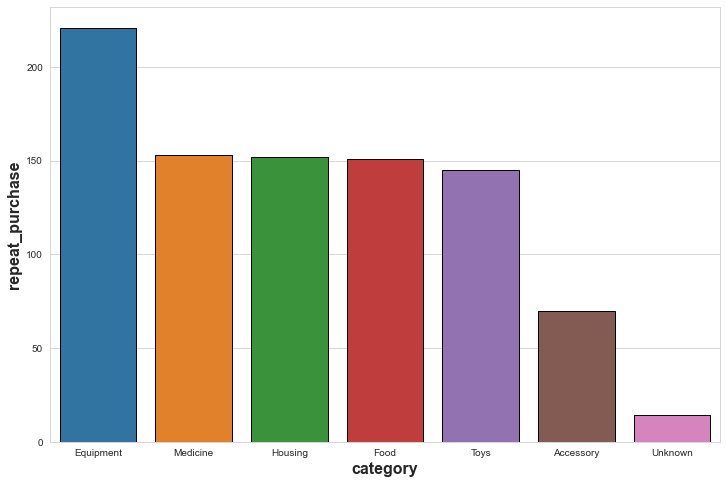

In [141]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
plt.xlabel("Category", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=16, fontweight='bold')
sns.barplot(data=grouped, x=grouped.index, y='repeat_purchase', edgecolor = 'black')

**Description:**\
The categories Medicine, Housing, Food and Toys have a similar number of repeat purchases.\
Category Equipment has significantly more repeat purchases, while categories Accessory and Unknown have significantly fewer.

### Distribution

In [143]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,1860.62,1860.62,7.0,1
1,2,Housing,Bird,Medium,963.60,963.60,6.0,0
2,3,Food,Dog,Medium,898.30,898.30,5.0,1
3,4,Medicine,Cat,Small,982.15,982.15,6.0,1
4,5,Housing,Cat,Small,832.63,832.63,7.0,1


In [147]:
df['sales'].describe()

count    1500.000000
mean      996.597847
std       323.952676
min       286.940000
25%       747.420000
50%      1000.830000
75%      1158.157500
max      2255.960000
Name: sales, dtype: float64

Text(0.5, 1.0, 'Distribution')

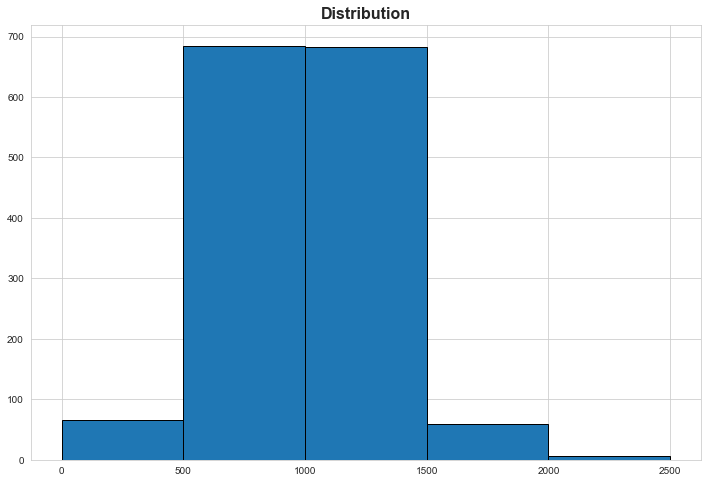

In [163]:
bins = np.arange(0, 2501, 500)
plt.figure(figsize=(12, 8))
plt.hist(df['sales'], bins=bins, edgecolor = 'black')
plt.title("Distribution", fontsize=16, fontweight='bold')

**Description:**\
From the sales distribution histogram, we can see that the vast majority of sales fall within the range of 500 to 1500.\
The least amount of values are in the range of 2000 to 2500.

### Relationship between repeat purchases and sales.

In [173]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,1860.62,1860.62,7.0,1
1,2,Housing,Bird,Medium,963.60,963.60,6.0,0
2,3,Food,Dog,Medium,898.30,898.30,5.0,1
3,4,Medicine,Cat,Small,982.15,982.15,6.0,1
4,5,Housing,Cat,Small,832.63,832.63,7.0,1


C:\Users\GRZEGORZ\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Relationship between repeat purchases and sales'}, xlabel='repeat_purchase', ylabel='sales'>

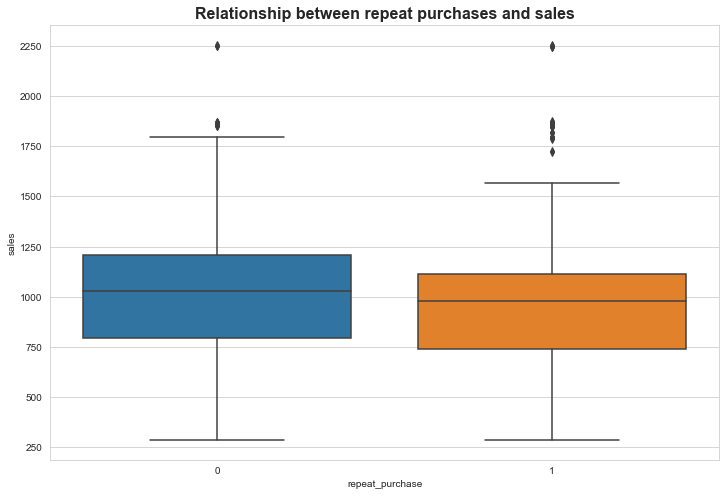

In [177]:
plt.figure(figsize=(12, 8))
plt.title("Relationship between repeat purchases and sales", fontsize=16, fontweight='bold')
sns.boxplot(df['repeat_purchase'], df['sales'])

<AxesSubplot:>

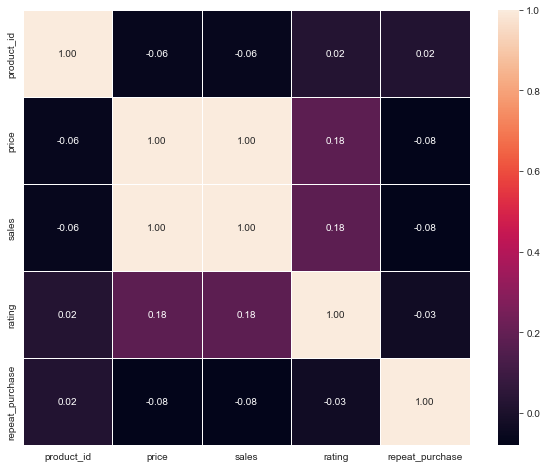

In [186]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, fmt=".2f", linewidth=.5)

**Description:**\
The correlation between repeat purchase and sales is -0.08, which means that there is no correlation because it is almost equal to 0.